In [22]:
import pandas as pd 
from sklearn import *
import seaborn as sns
# Donwload Dataset via API unzipped
# api.dataset_download_files(dataset="prathamtripathi/drug-classification", unzip=True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('RT_IOT2022', header = None)
df.to_csv('IOT.csv', index=False, header=False)

/var/folders/ld/275050r97dd74s4xh62v6x9m0000gn/T/ipykernel_21238/66755027.py:1: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('RT_IOT2022', header = None)


In [3]:
df = pd.read_csv('IOT.csv')
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [4]:
# Replace dots with underscores in column names
df.columns = df.columns.str.replace(r'\.', '_', regex=True)
df.head()

,Unnamed: 0,id_orig_p,id_resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active_std,idle_min,idle_max,idle_tot,idle_avg,idle_std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1.0,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2.0,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3.0,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4.0,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [5]:
df['id_orig_p'].duplicated().sum()
df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
#df['Attack_type'].unique()
df['Attack_type'].value_counts()
#Thing_Speak, MQTT_Publish, Wipro_bulb, 

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [7]:
#Transform Attack_type column into binary classifying Attacks into Attack and Normal to Normal

# Define the mapping: the specified types will be mapped to 'Normal', everything else to 'Attack'
df['Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x in ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'] else 'Attack')

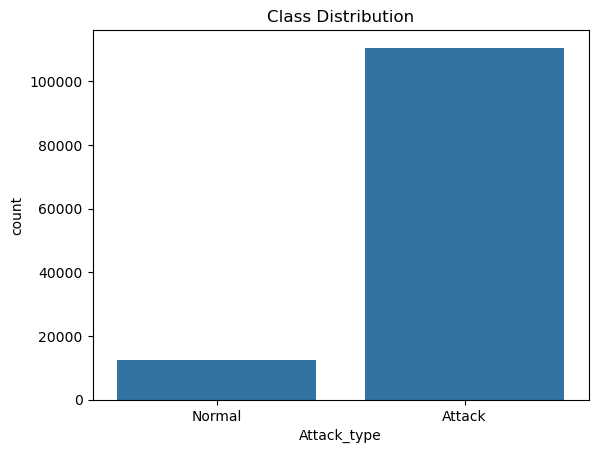

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking for Distribution in Attack_type Columns

sns.countplot(x='Attack_type', data=df)
plt.title("Class Distribution")
plt.show()

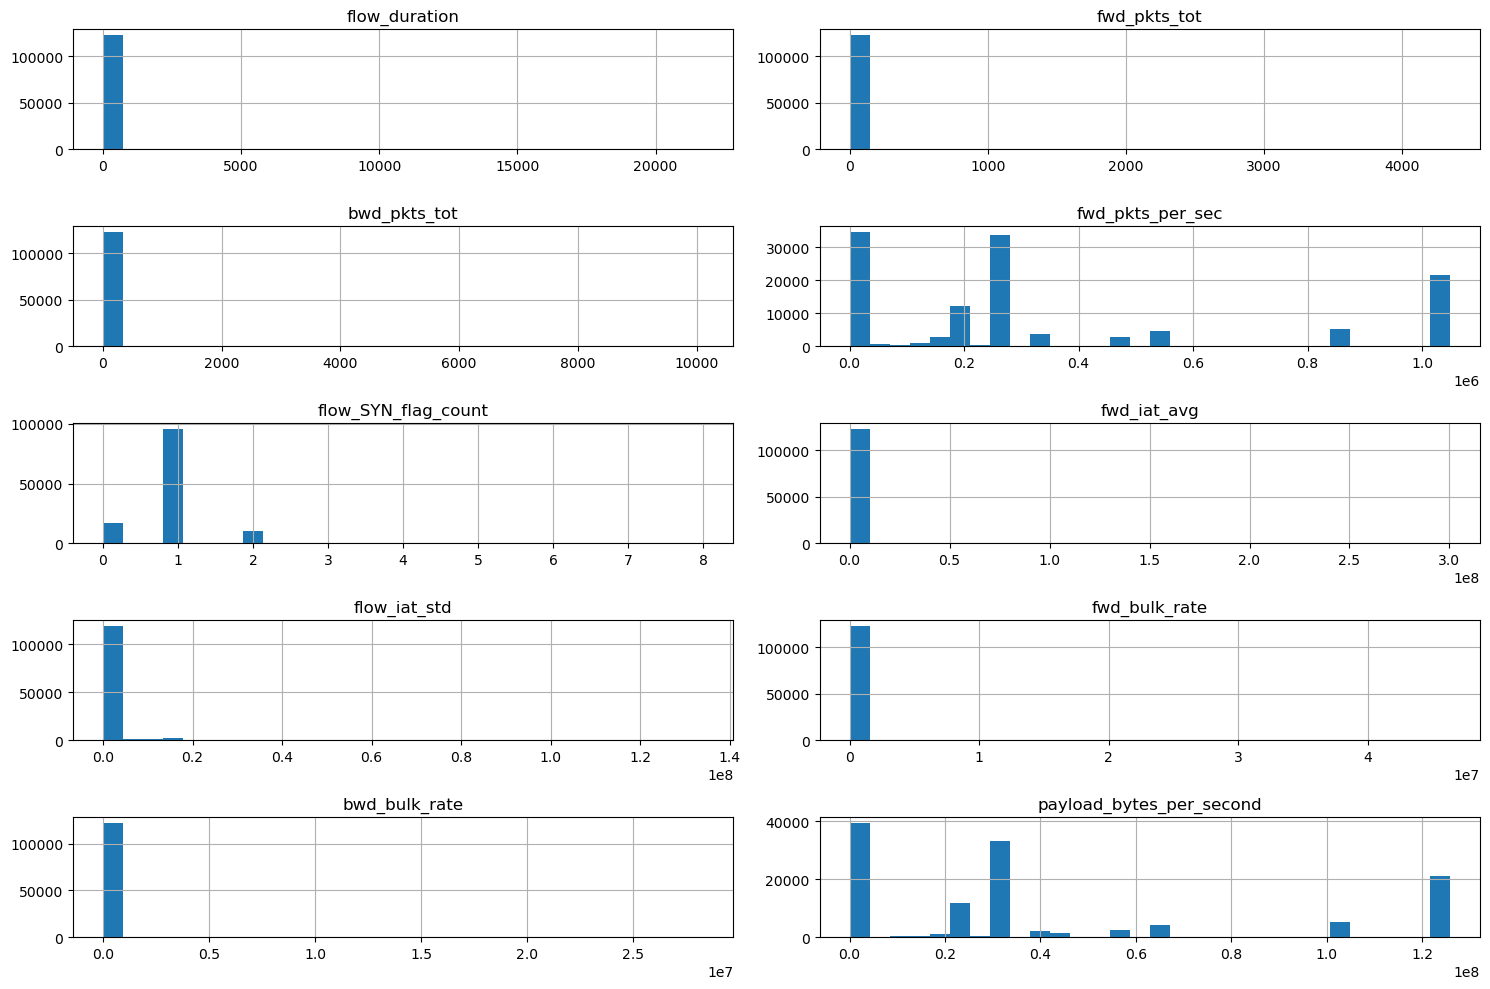

In [9]:
# List of 10 feature names (columns) from your DataFrame
features = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'flow_SYN_flag_count',
            'fwd_iat_avg', 'flow_iat_std', 'fwd_bulk_rate', 'bwd_bulk_rate', 'payload_bytes_per_second'] 
            

# Plot histograms for the selected features
df[features].hist(bins=30, figsize=(15, 10), layout=(5, 2))  # Adjust layout based on preference
plt.tight_layout()  # Ensure that subplots don't overlap
plt.show()



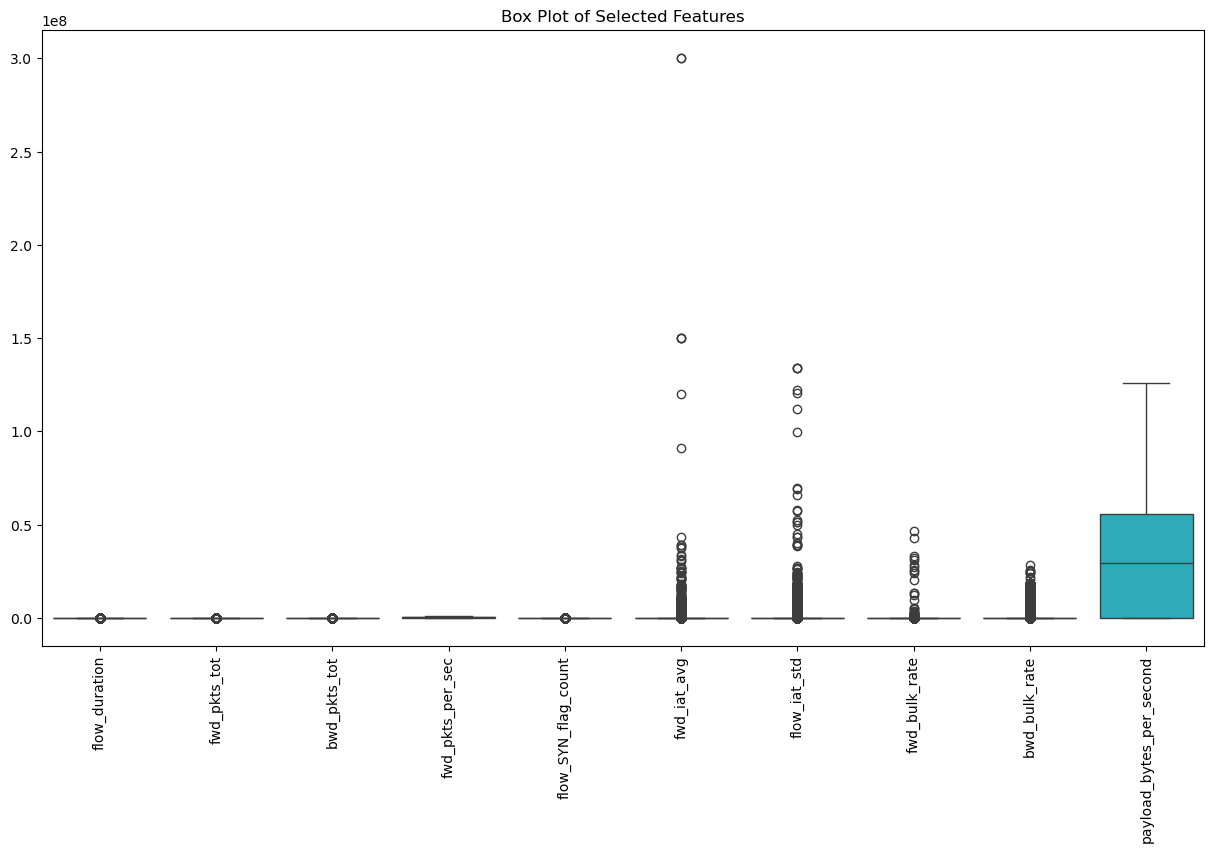

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features])
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Selected Features')
plt.show()

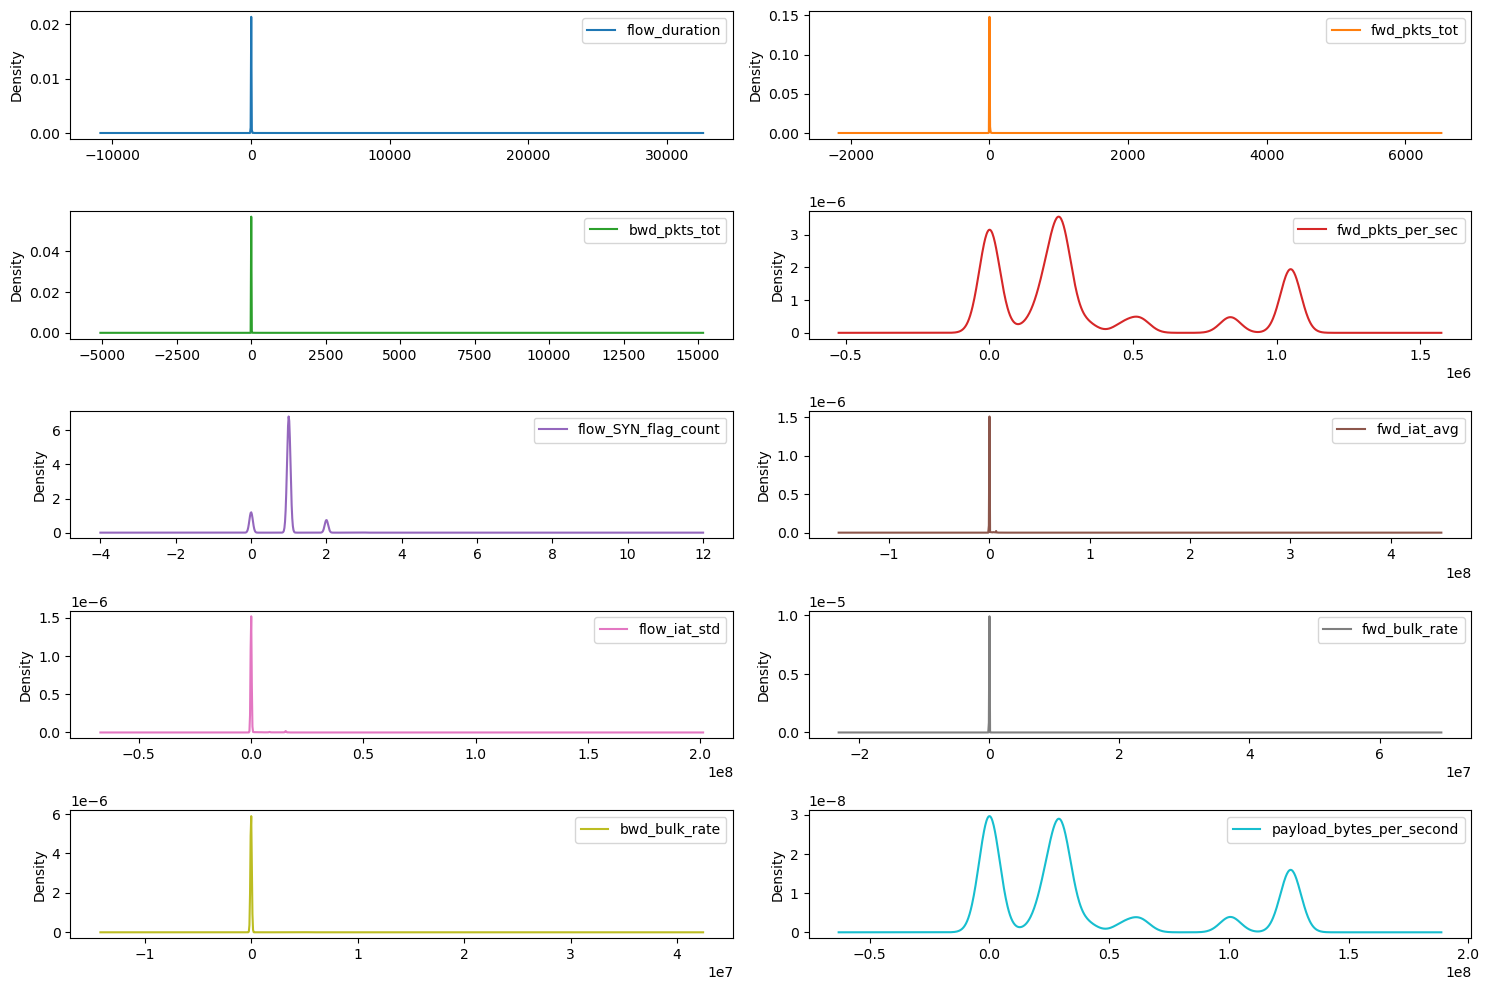

In [11]:
# Plot density (KDE) plots for the selected 10 features
df[features].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(15, 10))  # Adjust layout based on preference
plt.tight_layout()  # Ensure that subplots don't overlap
plt.show()

In [19]:
# Converting object columns to dummy variables
iot_df = pd.get_dummies(df)

corr_df = iot_df.corr()

corr_df.head()

,id_orig_p,id_resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl,Attack_type_Attack,Attack_type_Normal
id_orig_p,1.000000,0.168818,0.019978,0.040027,0.021090,0.017724,0.017749,-0.095665,-0.095754,-0.095710,...,0.179950,0.073654,0.014984,0.123795,0.020957,0.006243,0.004196,0.123736,-0.203085,0.203085
id_resp_p,0.168818,1.000000,0.012719,0.005481,-0.004072,0.001625,-0.001290,-0.135708,-0.135704,-0.135707,...,0.012223,-0.030243,0.020105,0.030798,-0.005319,0.000612,-0.002847,-0.014745,0.000028,-0.000028
flow_duration,0.019978,0.012719,1.000000,0.741707,0.071395,0.754355,0.058859,-0.027805,-0.027799,-0.027802,...,-0.007644,0.002857,0.009134,0.056914,-0.000695,-0.000118,-0.000210,0.059003,-0.059628,0.059628
fwd_pkts_tot,0.040027,0.005481,0.741707,1.000000,0.407452,0.914683,0.379742,-0.053855,-0.053875,-0.053865,...,-0.001982,0.043200,0.027196,0.062383,-0.001666,-0.000229,0.008741,0.135009,-0.093758,0.093758
bwd_pkts_tot,0.021090,-0.004072,0.071395,0.407452,1.000000,0.094172,0.992956,-0.026131,-0.026121,-0.026126,...,-0.001846,0.033138,0.012980,0.021943,-0.000895,-0.000233,0.005425,0.092129,-0.041416,0.041416


In [13]:
columns_list = list(corr_df.columns)

# Define the number of columns to display at a time
chunk_size = 20

# Loop through the columns list and print in chunks
for i in range(0, len(columns_list), chunk_size):
    print(columns_list[i:i + chunk_size])

['id_orig_p', 'id_resp_p', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count']
['fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload_min', 'fwd_pkts_payload_max', 'fwd_pkts_payload_tot', 'fwd_pkts_payload_avg', 'fwd_pkts_payload_std', 'bwd_pkts_payload_min', 'bwd_pkts_payload_max', 'bwd_pkts_payload_tot', 'bwd_pkts_payload_avg', 'bwd_pkts_payload_std', 'flow_pkts_payload_min', 'flow_pkts_payload_max', 'flow_pkts_payload_tot']
['flow_pkts_payload_avg', 'flow_pkts_payload_std', 'fwd_iat_min', 'fwd_iat_max', 'fwd_iat_tot', 'fwd_iat_avg', 'fwd_iat_std'

In [14]:
# Threshold to consider highly correlated features
high_threshold = 0.95

# Find list pairings of highly correlated features (excluding 'Attack_type_attack')
high_corr_pairs = []
for i in range(len(corr_df.columns)):
    for j in range(i + 1, len(corr_df.columns)):
        if abs(corr_df.iloc[i, j]) > high_threshold and corr_df.index[i] != 'Attack_type_Normal' and corr_df.columns[j] != 'Attack_type_Normal':
            high_corr_pairs.append([corr_df.index[i], corr_df.columns[j]])

# Compare correlations with 'Attack_type_attack' and determine which features to drop
features_to_drop = []
for pair in high_corr_pairs:
    feature1, feature2 = pair
    if abs(corr_df.loc[feature1, 'Attack_type_Normal']) >= abs(corr_df.loc[feature2, 'Attack_type_Normal']):
        features_to_drop.append(feature2)  # Drop the feature with lower correlation with Attack_type_attack
    else:
        features_to_drop.append(feature1)

# Remove duplicates from the features_to_drop list
#features_to_drop = list(set(features_to_drop))

In [15]:
print(list(features_to_drop))

['fwd_iat_tot', 'flow_duration', 'idle_tot', 'bwd_data_pkts_tot', 'bwd_pkts_tot', 'bwd_pkts_tot', 'bwd_pkts_payload_tot', 'flow_pkts_payload_tot', 'bwd_data_pkts_tot', 'bwd_pkts_payload_tot', 'flow_pkts_payload_tot', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'payload_bytes_per_second', 'bwd_pkts_per_sec', 'payload_bytes_per_second', 'payload_bytes_per_second', 'bwd_header_size_tot', 'bwd_pkts_payload_tot', 'flow_pkts_payload_tot', 'bwd_header_size_min', 'bwd_pkts_payload_max', 'flow_pkts_payload_max', 'bwd_pkts_payload_tot', 'fwd_iat_std', 'fwd_iat_max', 'flow_iat_std', 'fwd_iat_max', 'idle_max', 'fwd_iat_max', 'fwd_iat_tot', 'idle_tot', 'fwd_iat_std', 'fwd_iat_std', 'fwd_iat_std', 'fwd_iat_std', 'fwd_iat_std', 'flow_iat_std', 'flow_iat_max', 'idle_max', 'flow_iat_max', 'idle_tot', 'flow_iat_std', 'flow_iat_std', 'flow_iat_std', 'bwd_subflow_bytes', 'fwd_bulk_bytes', 'bwd_bulk_bytes', 'active_std', 'idle_max', 'idle_avg', 'idle_max', 'proto_udp']


In [16]:
# Dropping features with low correlation with target


# Threshold to consider low correlation features with 'Attack_type_Attack'
low_threshold = 0.05

# Find features with correlation below the threshold with 'Attack_type_Attack'
low_corr_features = []
for feature in corr_df.index:
    if feature != 'Attack_type_Attack' and abs(corr_df.loc[feature, 'Attack_type_Attack']) < low_threshold:
        low_corr_features.append(feature)

# Output the list of features with low correlation to 'Attack_type_Attack'

In [17]:
print(list(low_corr_features))

['id_resp_p', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'bwd_header_size_tot', 'fwd_URG_flag_count', 'fwd_pkts_payload_max', 'fwd_pkts_payload_tot', 'bwd_pkts_payload_tot', 'flow_pkts_payload_min', 'flow_pkts_payload_tot', 'flow_pkts_payload_avg', 'fwd_iat_min', 'bwd_iat_min', 'bwd_iat_tot', 'flow_iat_min', 'fwd_subflow_bytes', 'bwd_subflow_bytes', 'fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'active_tot', 'active_std', 'idle_std', 'fwd_last_window_size', 'service_dhcp', 'service_radius', 'service_ssh']


In [20]:
#ml_df = iot_df.drop(columns=features_to_drop)
#ml_df = iot_df.drop(columns=low_corr_features)
ml_df = iot_df

In [40]:
features = ml_df.drop(columns=['Attack_type_Attack','Attack_type_Normal'])
target = ml_df["Attack_type_Attack"]

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)


In [31]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

#Check distribution again

In [38]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

#Check distribution again


In [39]:
#Normalize Data after Train Split
normalizer = MinMaxScaler() #define normalizer

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train) # Normalize 80% training dats
X_test_norm = normalizer.transform(X_test) # Normalize 20% Testing Data

#Apply to test and training data
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)